In [1]:
import pandas as pd

#Prepare DataFrame
df = pd.read_csv('../data/BCCC-CIRA-CIC-DoHBrw-2020.csv')


In [2]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

# Explorative Data Analysis

# Check for null values
#print(df.isnull().sum())

# Fill null values with mean
if df.isnull().sum().sum() > 0:
    df = df.fillna(df.mean())

# Encode categorical data
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['Label'])

print(df['Label'].head())
print(encoder.classes_)

df.describe()

# svm

# Multi colinearity - maybe remove repeated 

# the input to variance_inflation_factor should be a dataframe of all numeric, non-categorical variables
# numeric_df = df_encoded.select_dtypes(include=[np.number])

# vif = pd.DataFrame()
# vif["VIF Factor"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
# vif["features"] = numeric_df.columns

# print(vif)

# Pairplot
#sns.pairplot(df_encoded, vars=[])


0    0
1    1
2    1
3    0
4    0
Name: Label, dtype: int32
['Benign' 'Malicious']


,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
count,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,...,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000
mean,4.020093e+04,4.733915e+04,4.250156e+04,3.166829e+04,9.263585e+04,220.169083,173.159814,95.472702,70.749953,0.442934,...,0.972995,1.711825,0.319586,0.442021,0.394671,0.205894,-0.968984,-0.060800,1.114611,0.500000
std,1.439617e+05,4.212751e+05,1.393927e+05,2.566805e+05,1.534938e+05,210.141825,85.506490,32.999740,14.830277,1.551998,...,0.520212,11.106412,1.244031,2.071807,2.351233,1.724873,3.163775,3.198770,1.735820,0.500001
min,5.500000e+01,1.464903e+00,5.400000e+01,1.576245e+00,0.000000e+00,0.000000,56.000000,54.000000,54.000000,-10.000000,...,0.077182,0.000000,0.000000,0.000005,0.000002,-0.000001,-10.000000,-10.000000,0.000000,0.000000
25%,6.180000e+02,5.410781e+01,4.760000e+02,1.418128e+02,4.692099e+02,21.661253,92.000000,76.000000,66.000000,0.199848,...,0.577836,0.000021,0.004454,0.010538,0.012238,0.000016,-1.797168,0.393686,0.552687,0.000000
50%,1.807000e+03,3.640969e+02,4.827000e+03,4.611146e+02,1.826789e+04,135.142971,152.488283,87.000000,68.000000,0.986397,...,0.748184,0.000079,0.008820,0.015148,0.015407,0.000034,0.000000,0.908002,0.800649,0.500000
75%,5.542000e+03,3.810260e+03,7.888000e+03,4.215498e+03,1.415989e+05,376.296309,228.758621,105.000000,68.000000,1.201609,...,1.516263,0.000357,0.018640,0.024903,0.016300,0.015161,0.936908,1.305393,1.208105,1.000000
max,8.015359e+06,2.304348e+07,7.723184e+06,7.600000e+06,1.578115e+06,1256.230616,689.800000,317.000000,553.000000,2.932375,...,5.616085,647.245330,25.441017,28.017596,28.017596,28.017596,2.970716,5.428781,66.309747,1.000000


In [3]:
from sklearn.model_selection import train_test_split

#Divide Data

# Target variable is 'Label'
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Decision Tree

A Decision Tree is a type of supervised learning algorithm that is mostly used for classification problems. 

It works for both categorical and continuous input and output variables. 

In this technique, we split the population into two or more homogeneous sets based on the most significant attributes/ input variables. 

A decision tree simply asks a question, and based on the answer (Yes/No), it further splits the tree into subtrees.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Decision Tree model

tree_model = DecisionTreeClassifier()


In [5]:
# Define parameters for grid search
param_grid_tree = {
    'max_depth': [3, 5],
    'min_samples_split': [5, 10]
}

# Grid search to find best params
grid_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, 
                           cv=3, scoring='accuracy', n_jobs=-1)


In [6]:

# Fit model
grid_tree.fit(X_train, y_train)

# Final model with best params
tree_best_model = grid_tree.best_estimator_

# Print best params
print("Best params for tree model: ", grid_tree.best_params_)


Best params for tree model:  {'max_depth': 8, 'min_samples_split': 10}


In [7]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate Decision Tree Model

# cv represents K in K-Fold cross validation

# Decision Tree Performance
tree_pred_cv = cross_val_predict(tree_best_model, X, y, cv=3)
tree_accuracy = accuracy_score(y, tree_pred_cv)
tree_report = classification_report(y, tree_pred_cv, output_dict=True)

tree_precision = tree_report['weighted avg']['precision']
tree_recall = tree_report['weighted avg']['recall']
tree_f1 = tree_report['weighted avg']['f1-score']

# Print results
print("Tree Confusion Matrix:\n", confusion_matrix(y, tree_pred_cv))
print("Tree Accuracy:\n", tree_accuracy)
print("Classification Report:\n", classification_report(y, tree_pred_cv))



Tree Confusion Matrix:
 [[249040    513]
 [   312 249241]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    249553
           1       1.00      1.00      1.00    249553

    accuracy                           1.00    499106
   macro avg       1.00      1.00      1.00    499106
weighted avg       1.00      1.00      1.00    499106



### Random Forest

Random Forest is an ensemble machine learning algorithm that follows the bagging technique. 

It is an extension of the decision tree algorithm. 

It creates a set of decision trees from a randomly selected subset of the training set and then aggregates the votes from different decision trees to decide the final class of the test object. 

This technique of combining the prediction from multiple models helps to overcome the problem of overfitting in decision trees and improves the overall prediction accuracy.

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model

best_max_depth = tree_best_model.max_depth
best_min_samples_split = tree_best_model.min_samples_split

forest_model = RandomForestClassifier(max_depth=best_max_depth, 
                                      min_samples_split=best_min_samples_split)


In [9]:
# Define parameters for grid search
param_grid_forest = {
    'n_estimators': [50, 100] # number of trees in the forest
}

# Grid search to find best params
grid_forest = GridSearchCV(estimator=forest_model, param_grid=param_grid_forest,
                            cv=3, scoring='accuracy', n_jobs=-1)


In [ ]:
# Fit model
grid_forest.fit(X_train, y_train) # BE NOT AFRAID: yes, it takes time :)

# Final model with best params
forest_best_model = grid_forest.best_estimator_

# Print best params
print("Best params for forest model: ", grid_forest.best_params_)

Best params for forest model:  {'n_estimators': 50}


### Grid Search

Grid Search is a hyperparameter tuning technique used to find the optimal hyperparameters for a model. 

It works by defining a grid of parameters that will be searched using K-fold cross-validation. 

Essentially, the Grid Search technique exhaustively tries every combination of the provided hyper-parameter values in order to find the best model. 

After training for each combination, it then selects the hyperparameter values that yield the model with the best performance.

While it can be computationally expensive due to the potentially large number of combinations, Grid Search ensures the highest possible performance of a model by using the optimal hyperparameters.

### Metrics for Comparison
**Precision**: The ratio of correct positive identifications (true positives) to all positive identifications (true positives + false positives). Useful when the cost of false positives is high.

**Recall (Sensitivity)**: The ratio of true positives identified among all actual positive cases in the dataset. Important when it's crucial to identify all positive cases.

**F1-Score**: The harmonic mean of precision and recall. A metric that balances precision and recall, especially useful when classes are imbalanced.

**Confusion Matrix**: A table that shows the true positives, false positives, true negatives, and false negatives. It allows for a more detailed analysis of the model's behavior in relation to different classes

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_predict

# Evaluate Random Forest Model

# cv represents K in K-Fold cross validation

# Random Forest Performance
forest_pred_cv = cross_val_predict(grid_forest.best_estimator_, X, y, cv=3)
forest_accuracy = accuracy_score(y, forest_pred_cv)
forest_report = classification_report(y, forest_pred_cv, output_dict=True)

forest_precision = forest_report['weighted avg']['precision']
forest_recall = forest_report['weighted avg']['recall']
forest_f1 = forest_report['weighted avg']['f1-score']

# Print results
print("Forest Confusion Matrix:\n", confusion_matrix(y, forest_pred_cv))
print("Forest Accuracy:\n", forest_accuracy)
print("Classification Report:\n", classification_report(y, forest_pred_cv))


Forest Confusion Matrix:
 [[249374    179]
 [   647 248906]]
Forest Accuracy:
 0.9983450409331885
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    249553
           1       1.00      1.00      1.00    249553

    accuracy                           1.00    499106
   macro avg       1.00      1.00      1.00    499106
weighted avg       1.00      1.00      1.00    499106



### ROC AUC Curve

A Receiver Operating Characteristic (ROC) curve is a graphical plot used for binary classification problems. It illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied. The Area Under the Curve (AUC) of the ROC plot provides a single number summary of the classifier performance. The closer the AUC is to 1, the better the model is.

**fpr_tree**: This stands for False Positive Rate for the Decision Tree model. It's the ratio of negative instances that are incorrectly classified as positive. It's calculated as FP / (FP + TN), where FP is the number of false positives and TN is the number of true negatives.

**tpr_tree**: This stands for True Positive Rate (also known as Recall or Sensitivity) for the Decision Tree model. It's the ratio of positive instances that are correctly classified as positive. It's calculated as TP / (TP + FN), where TP is the number of true positives and FN is the number of false negatives.

**thresholds_tree**: These are the decision thresholds for the Decision Tree model at which the FPR and TPR are calculated. The decision function of many classifiers provides a certainty score for observations. Changing the threshold changes the FPR and TPR, and the ROC curve plots these changes.

Decision Tree AUC ROC:  0.9994959605824287
Random Forest AUC ROC:  0.9999616246363835


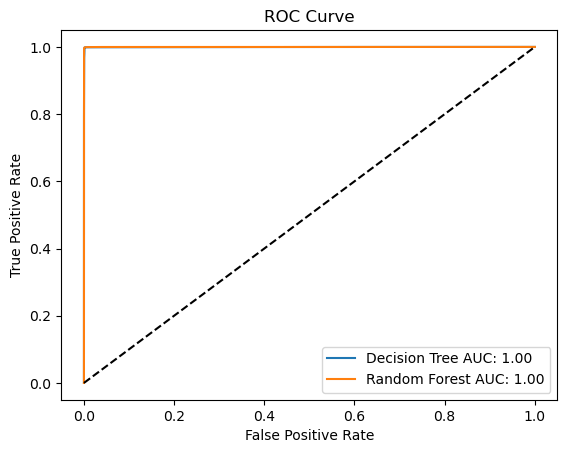

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC-AUC Curve

tree_probs = cross_val_predict(grid_tree.best_estimator_, X, y, cv=3, method='predict_proba')[:, 1]
forest_probs = cross_val_predict(grid_forest.best_estimator_, X, y, cv=3, method='predict_proba')[:, 1]

tree_auc_roc = roc_auc_score(y, tree_probs)
forest_auc_roc = roc_auc_score(y, forest_probs)

print("Decision Tree AUC ROC: ", tree_auc_roc)
print("Random Forest AUC ROC: ", forest_auc_roc)


# Plot ROC curves

fpr_tree, tpr_tree, thresholds_tree = roc_curve(y, tree_probs)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y, forest_probs)

plt.figure()

plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree AUC: {tree_auc_roc:.2f}')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest AUC: {forest_auc_roc:.2f}')

plt.plot([0, 1], [0, 1], 'k--') # diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


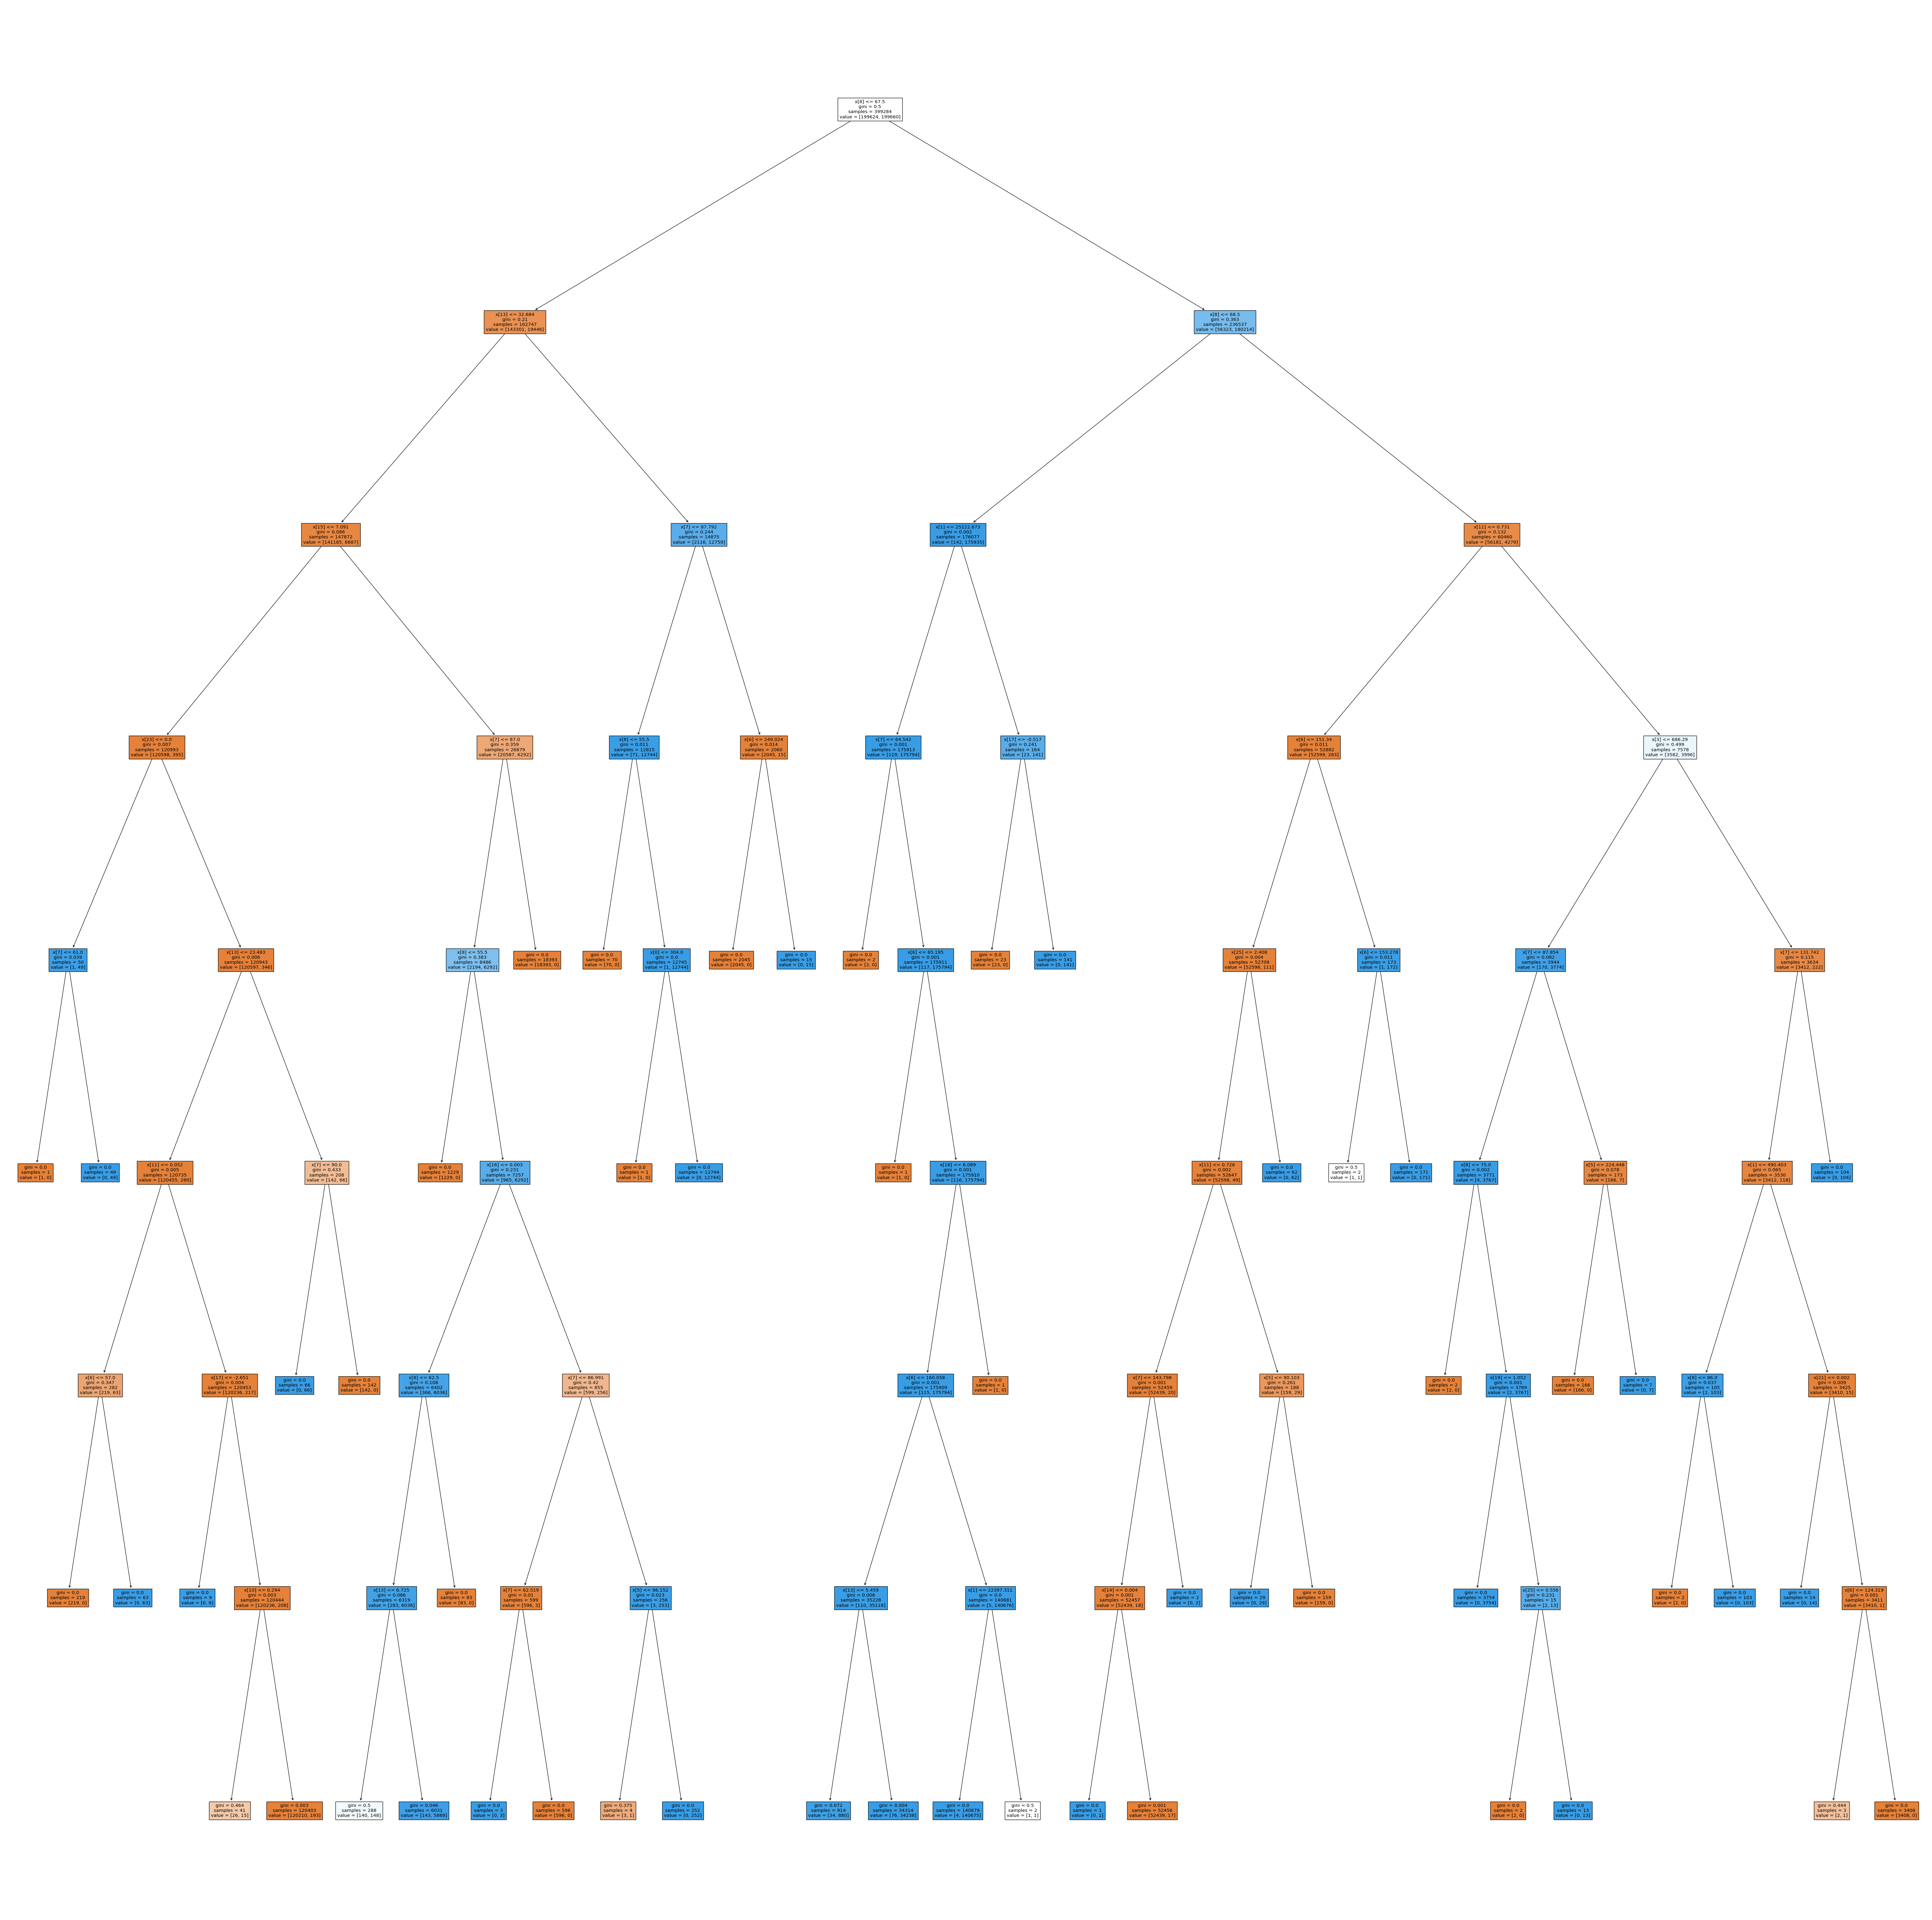

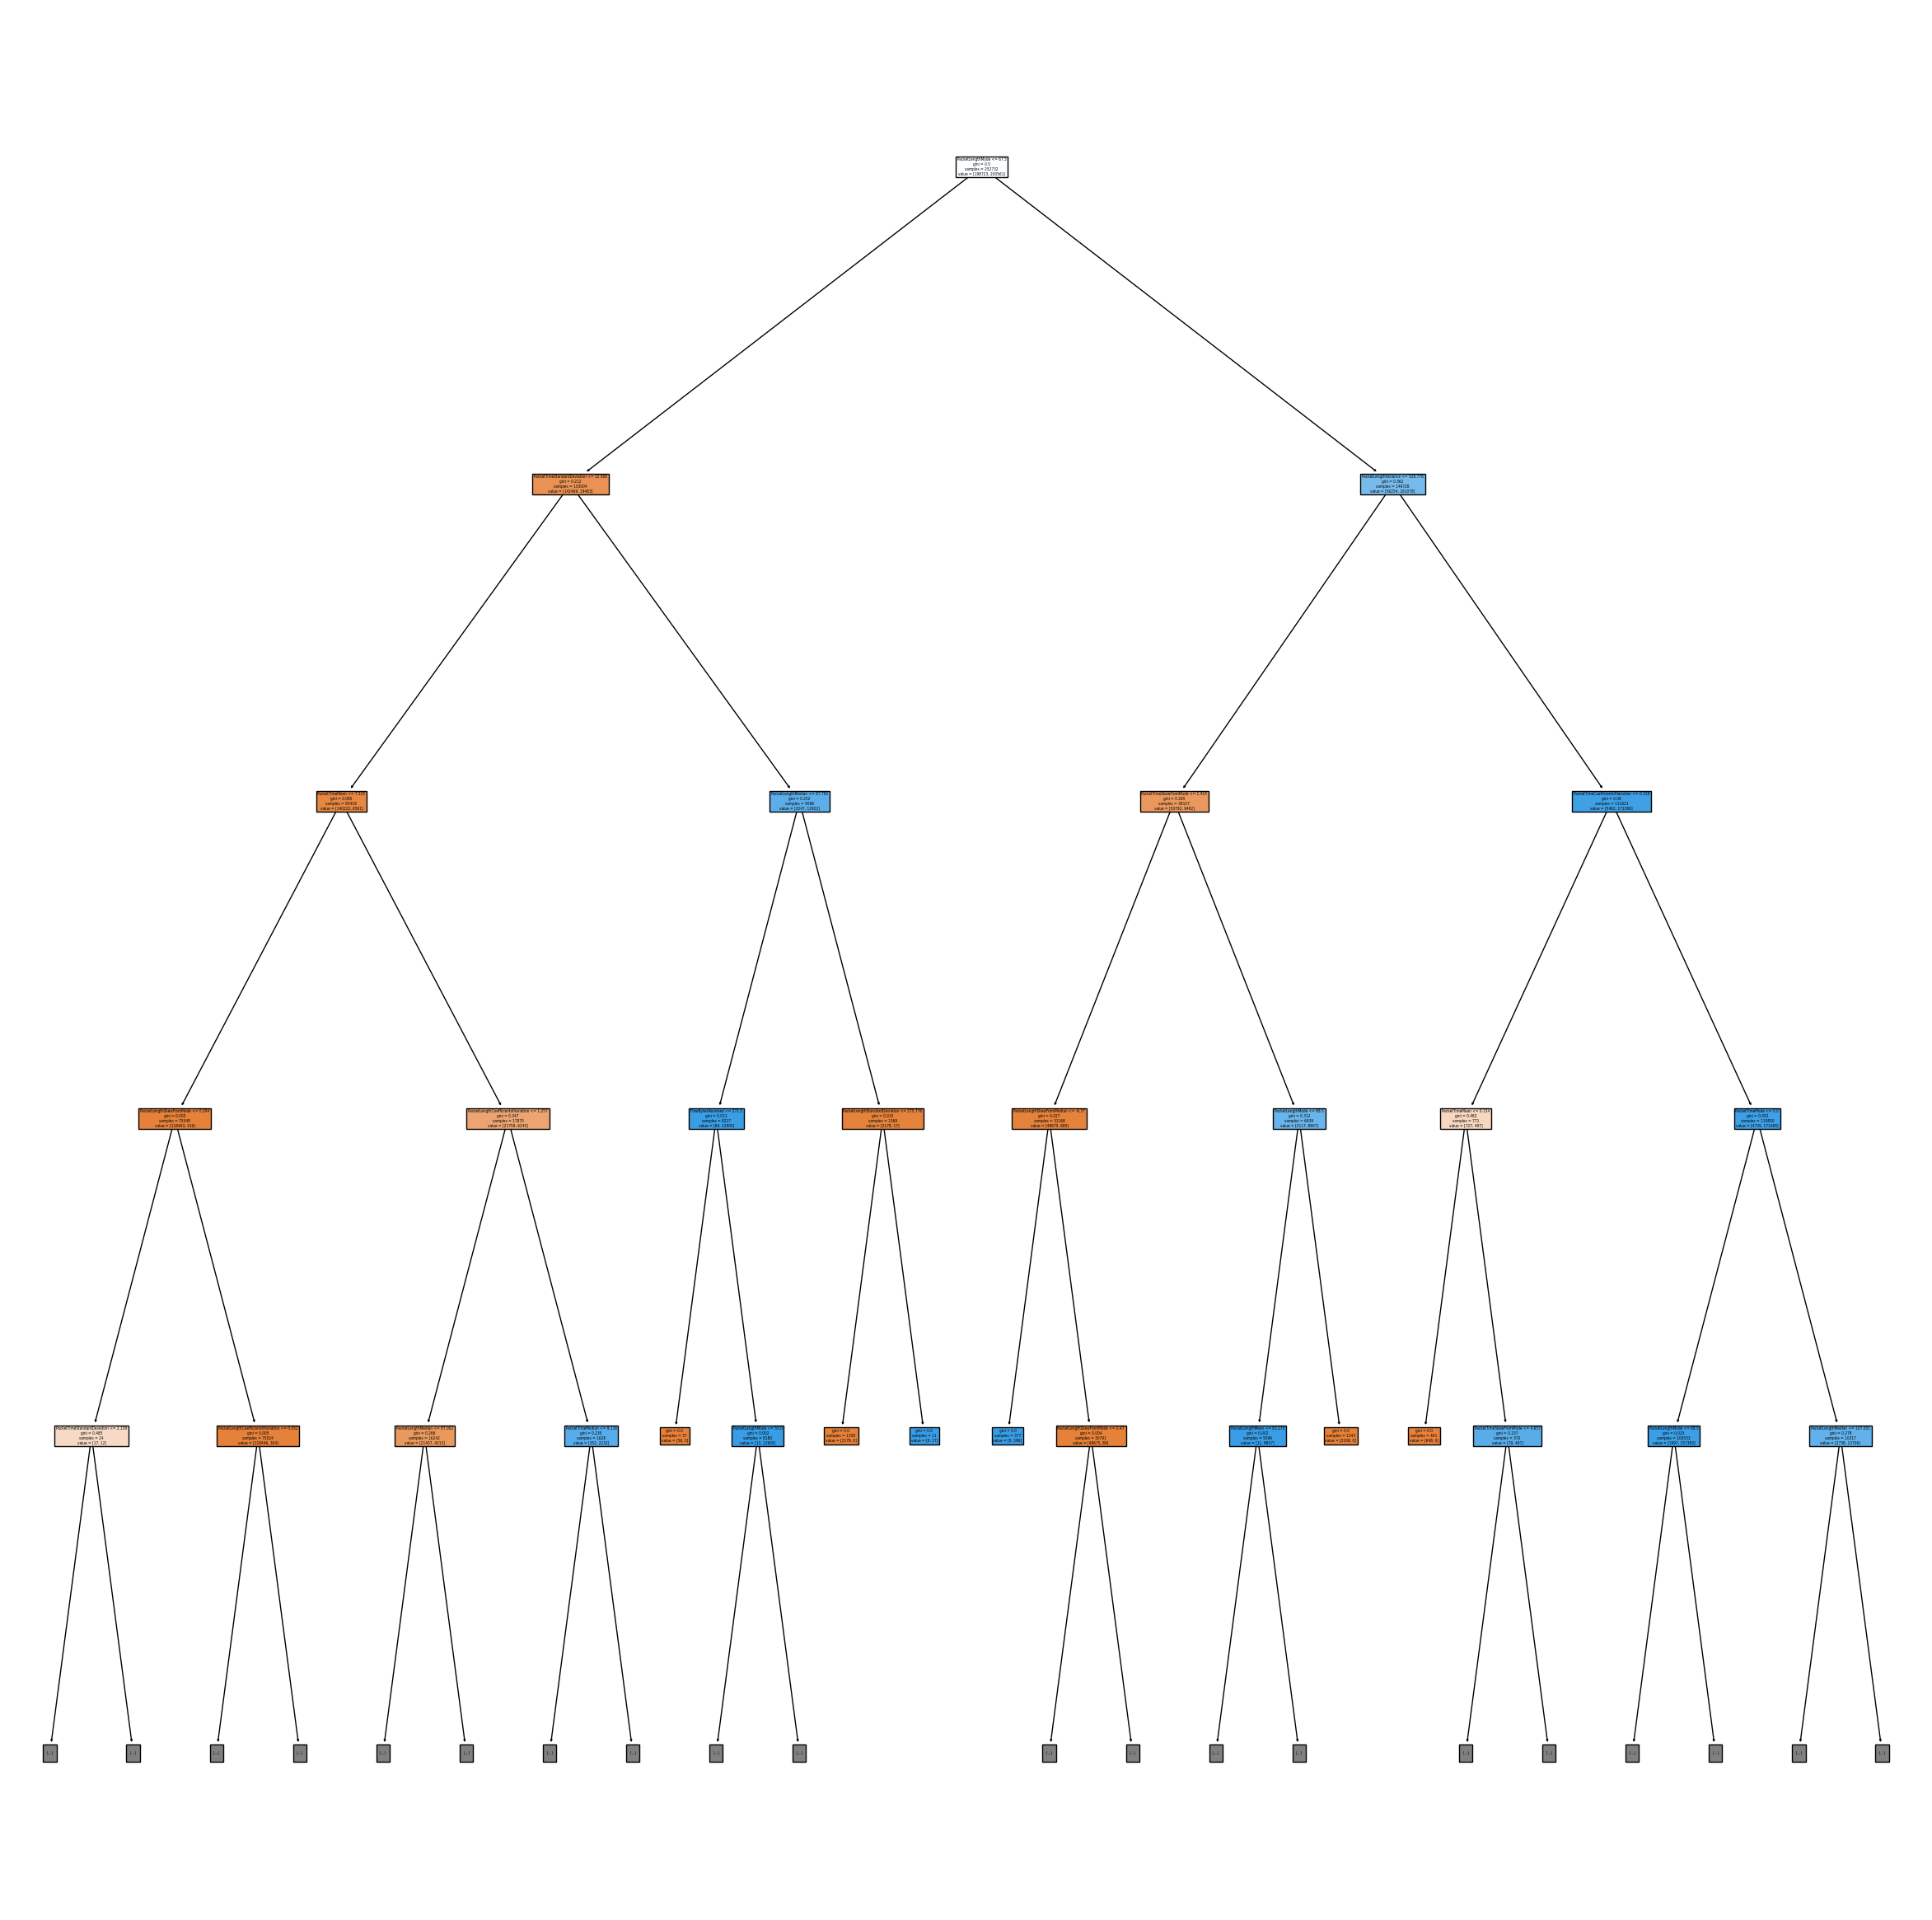

In [16]:
from sklearn import tree

#Visualize 
plt.figure(figsize=(80,80))  
tree.plot_tree(tree_best_model, filled=True)
plt.show()

estimator = forest_best_model.estimators_[5]
plt.figure(figsize=(30,30))
tree.plot_tree(estimator, filled=True, feature_names = X.columns, max_depth=4)
plt.show()


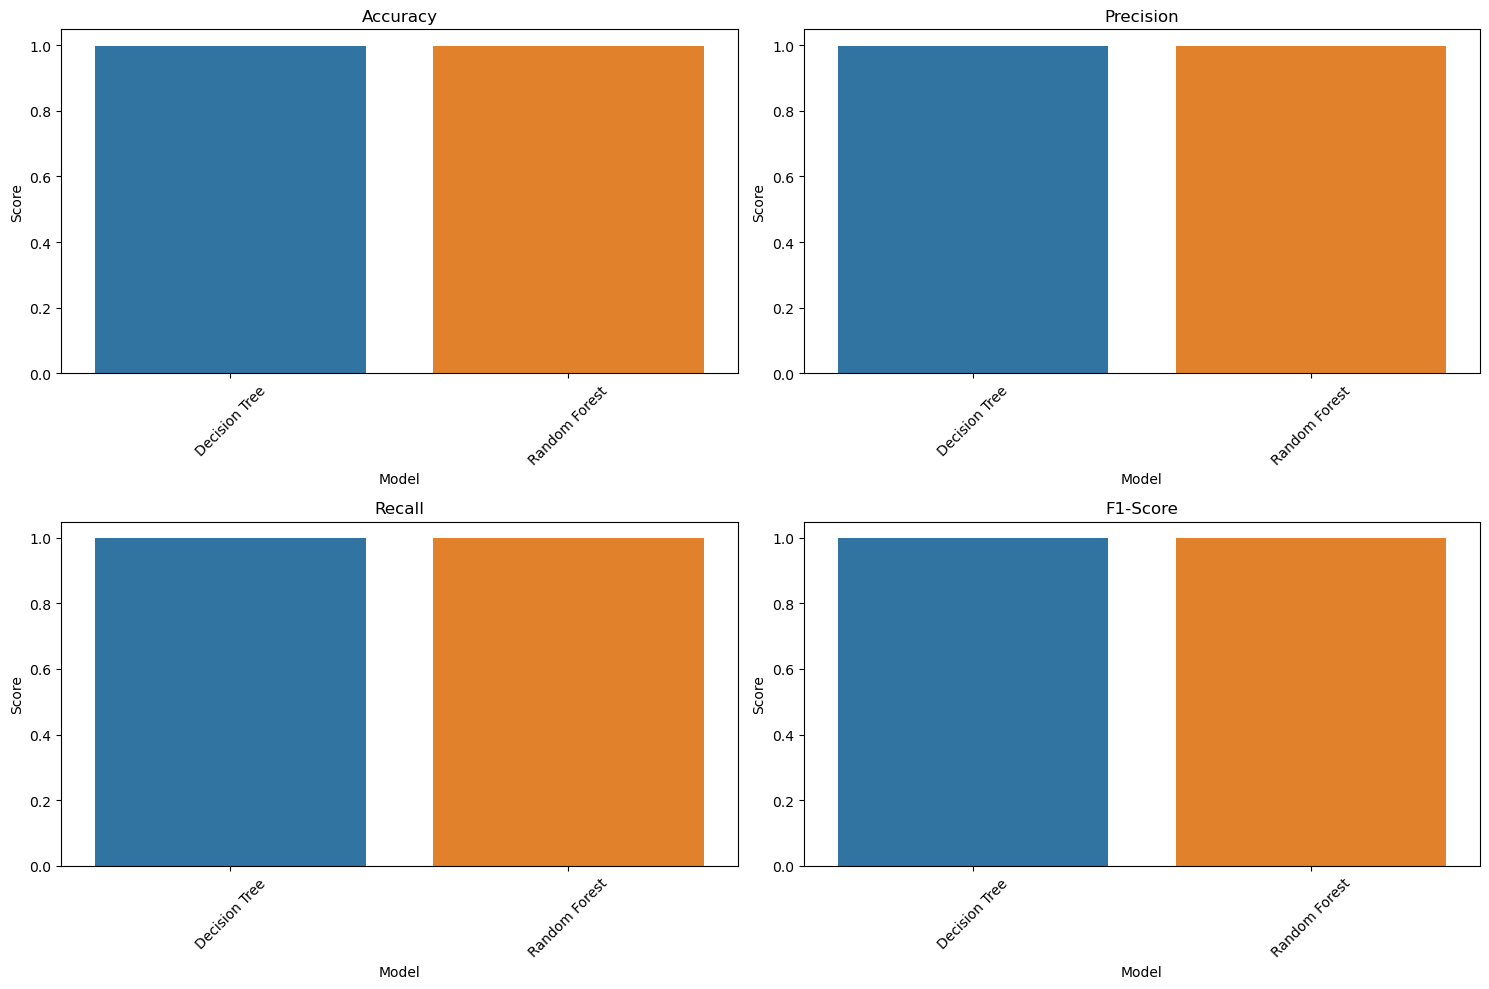

In [21]:
import seaborn as sns

metrics = {'Accuracy': [tree_accuracy, forest_accuracy], 
            'Precision': [tree_precision, forest_precision],
            'Recall': [tree_recall, forest_recall],
            'F1-Score': [tree_f1, forest_f1]
            }
metrics_df = pd.DataFrame(metrics, index=['Decision Tree', 'Random Forest'])

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(ax=axes[0, 0], x=metrics_df.index, y=metrics_df['Accuracy'])
axes[0, 0].set_title('Accuracy')

sns.barplot(ax=axes[0, 1], x=metrics_df.index, y=metrics_df['Precision'])
axes[0, 1].set_title('Precision')

sns.barplot(ax=axes[1, 0], x=metrics_df.index, y=metrics_df['Recall'])
axes[1, 0].set_title('Recall')

sns.barplot(ax=axes[1, 1], x=metrics_df.index, y=metrics_df['F1-Score'])
axes[1, 1].set_title('F1-Score')

for ax in axes.flat:
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')
    ax.set_xticklabels(metrics_df.index, rotation=45)

plt.tight_layout()
plt.show()
